# Jet Rail - Time Series forecasting

### Load the dataset into panda's dataframe


In [1]:
import pandas as pd

In [11]:
data = pd.read_csv('data/Train.csv')
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


### Compute the difference between data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [13]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.7 KB


In [6]:
data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [14]:
data.Datetime.diff()

0            NaT
1       01:00:00
2       01:00:00
3       01:00:00
4       01:00:00
5       01:00:00
6       01:00:00
7       01:00:00
8       01:00:00
9       01:00:00
10      01:00:00
11      01:00:00
12      01:00:00
13      01:00:00
14      01:00:00
15      01:00:00
16      01:00:00
17      01:00:00
18      01:00:00
19      01:00:00
20      01:00:00
21      01:00:00
22      01:00:00
23      01:00:00
24      01:00:00
25      01:00:00
26      01:00:00
27      01:00:00
28      01:00:00
29      01:00:00
          ...   
18258   01:00:00
18259   01:00:00
18260   01:00:00
18261   01:00:00
18262   01:00:00
18263   01:00:00
18264   01:00:00
18265   01:00:00
18266   01:00:00
18267   01:00:00
18268   01:00:00
18269   01:00:00
18270   01:00:00
18271   01:00:00
18272   01:00:00
18273   01:00:00
18274   01:00:00
18275   01:00:00
18276   01:00:00
18277   01:00:00
18278   01:00:00
18279   01:00:00
18280   01:00:00
18281   01:00:00
18282   01:00:00
18283   01:00:00
18284   01:00:00
18285   01:00:

In [15]:
data = data.set_index(data['Datetime'])
data.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [16]:
data.drop(['Datetime'], axis=1, inplace=True)
data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [10]:
data.diff()

,ID,Count
Datetime,,
2012-08-25 00:00:00,NaN,NaN
2012-08-25 01:00:00,1.0,-6.0
2012-08-25 02:00:00,1.0,4.0
2012-08-25 03:00:00,1.0,-4.0
2012-08-25 04:00:00,1.0,0.0
2012-08-25 05:00:00,1.0,0.0
2012-08-25 06:00:00,1.0,0.0
2012-08-25 07:00:00,1.0,0.0
2012-08-25 08:00:00,1.0,4.0


In [17]:
import matplotlib.pyplot as plt

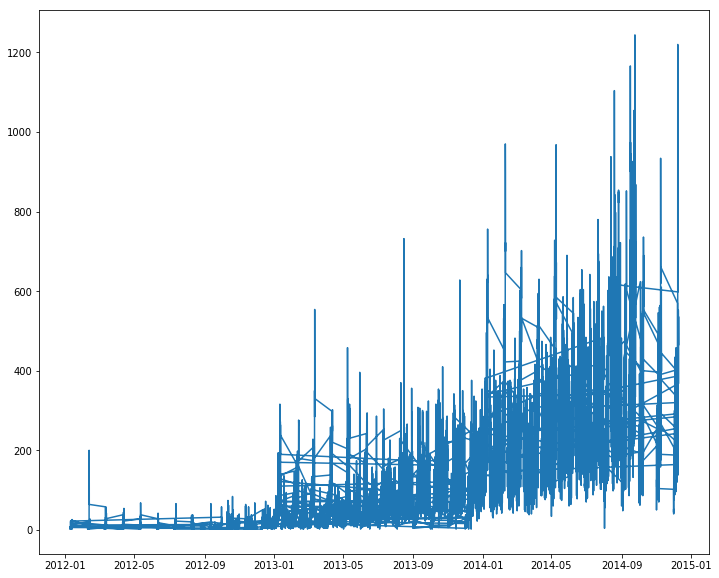

In [18]:
plt.figure(figsize=(12, 10))
plt.plot(data.Count)
plt.show()

### Exploratory Data Analysis

In [21]:
yearly_data = data.resample('Y').sum()
yearly_data.head()

,ID,Count
Datetime,,
2012-12-31,4791060,34932
2013-12-31,65485380,685968
2014-12-31,96939888,1820366


In [22]:
yearly_data.drop(['ID'], axis=1, inplace=True)
yearly_data.head()

,Count
Datetime,
2012-12-31,34932
2013-12-31,685968
2014-12-31,1820366


<Figure size 864x720 with 0 Axes>

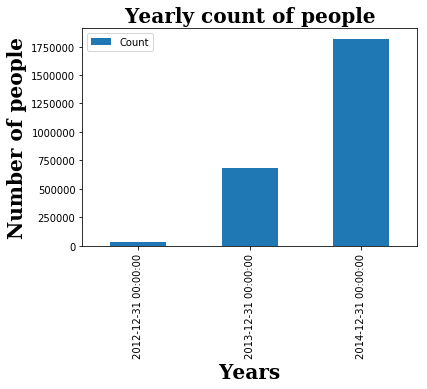

In [38]:
plt.figure(figsize=(12, 10))
yearly_data.plot.bar()

font = {
    'family': 'serif',
    'weight': 'bold',
    'size': 20
}
# plt.xticks(ticks=[2012, 2013, 2014], labels=['2012', '2013', '2014'])
plt.xlabel('Years', fontdict=font)
plt.ylabel('Number of people', fontdict=font)
plt.title('Yearly count of people', fontdict=font)
plt.savefig('yearly-count.png')
plt.show()

In [43]:
monthly_data = data.groupby(data.index.month).sum()
monthly_data

,ID,Count
Datetime,,
1,12645612,166530
2,12052980,165960
3,13965804,171404
4,14161092,203708
5,15329772,244540
6,15454788,235728
7,16693740,269496
8,17400696,316020
9,15494088,290694


In [44]:
monthly_data.drop(['ID'], axis=1, inplace=True)
monthly_data.head()

,Count
Datetime,
1,166530
2,165960
3,171404
4,203708
5,244540


<Figure size 864x720 with 0 Axes>

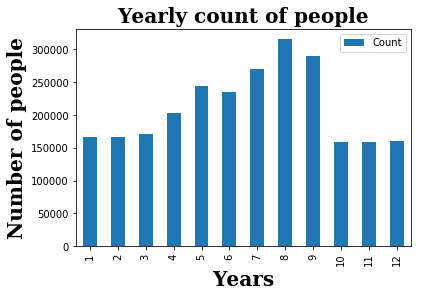

In [45]:
plt.figure(figsize=(12, 10))
monthly_data.plot.bar()

font = {
    'family': 'serif',
    'weight': 'bold',
    'size': 20
}
# plt.xticks(ticks=[2012, 2013, 2014], labels=['2012', '2013', '2014'])
plt.xlabel('Years', fontdict=font)
plt.ylabel('Number of people', fontdict=font)
plt.title('Yearly count of people', fontdict=font)
plt.savefig('yearly-count.png')
plt.show()